#1. Prepare the problem 

##Load libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_diabetes
from time import time
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (12,10)
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


##Load dataset

In [2]:
X, y = load_diabetes(as_frame = True, return_X_y=True)

# 2. A peak at the data


## Dataset overview

In [3]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
X.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [5]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [6]:
y.tail()

437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, dtype: float64

## Dataset dimensions

In [7]:
print(f"Number of instances:  {X.shape[0]}")
print(f"Number of attributes: {X.shape[1]}")

Number of instances:  442
Number of attributes: 10


## Check for null and missing values

In [8]:
print("Null Values:\n", X.isnull().sum())

Null Values:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [9]:
print("Missing Values:\n", X.isna().sum())

Missing Values:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


No null or missing values as expected from a dataset included in sklearn.

## Data type of each attribute

In [10]:
X.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object

## Target variable data type

In [11]:
y.dtypes

dtype('float64')

#3. Descriptive Statistics

## Statistical summary of all attributes

In [12]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


Note: All attributes have the same standard deviation, which means that their values have the same deviation from their mean. Also, all metric's values (mean, min, max, and percentiles) have the same or similar order of magnitude. These observations indicate that the dataset has been preprocessed in terms of scaling and standardization.

##Correlation between attributes

###Pearson

In [13]:
X.corr(method='pearson')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


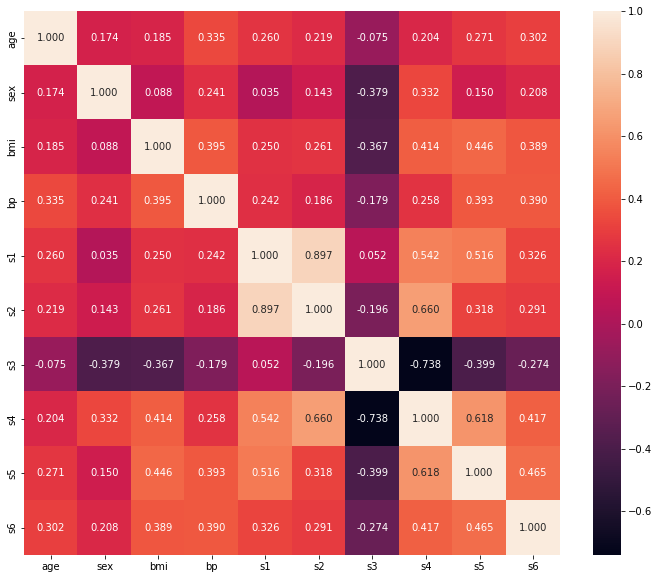

In [14]:
sns.heatmap(X.corr(method='pearson'), annot = True, fmt = '.3f')
plt.show()

Note: There is a relatively high correlation between 's1' and 's2' features. However, since we have neither information on what these attributes stand for nor expertise domain, we won't drop any of it.

###Kendall

In [15]:
X.corr(method='kendall')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.146580,0.136535,0.242111,0.182220,0.153612,-0.073846,0.160898,0.180544,0.201784
sex,0.146580,1.000000,0.080424,0.215733,0.022809,0.110208,-0.326188,0.297335,0.143172,0.168199
bmi,0.136535,0.080424,1.000000,0.281770,0.194171,0.198583,-0.249831,0.335625,0.344720,0.266373
bp,0.242111,0.215733,0.281770,1.000000,0.188067,0.140253,-0.131014,0.205948,0.268863,0.264566
s1,0.182220,0.022809,0.194171,0.188067,1.000000,0.717229,0.010695,0.393367,0.356268,0.227139
s2,0.153612,0.110208,0.198583,0.140253,0.717229,1.000000,-0.133332,0.503579,0.242250,0.194082
s3,-0.073846,-0.326188,-0.249831,-0.131014,0.010695,-0.133332,1.000000,-0.638633,-0.311775,-0.200545
s4,0.160898,0.297335,0.335625,0.205948,0.393367,0.503579,-0.638633,1.000000,0.485410,0.307397
s5,0.180544,0.143172,0.344720,0.268863,0.356268,0.242250,-0.311775,0.485410,1.000000,0.316235
s6,0.201784,0.168199,0.266373,0.264566,0.227139,0.194082,-0.200545,0.307397,0.316235,1.000000


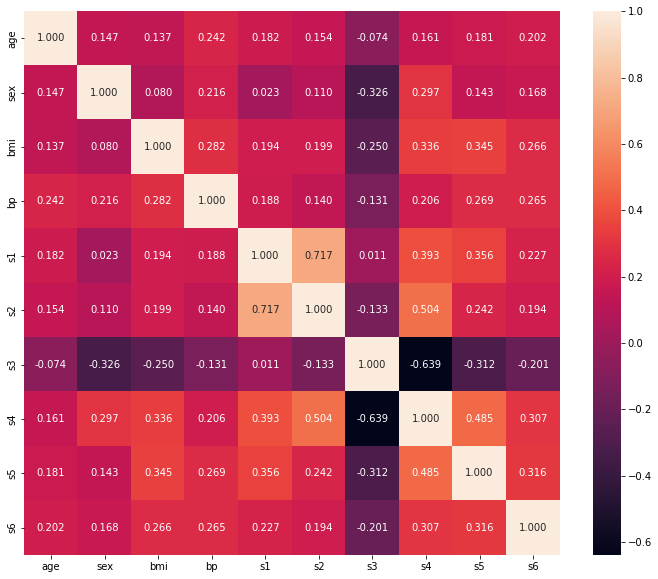

In [16]:
sns.heatmap(X.corr(method='kendall'), annot = True, fmt = '.3f')
plt.show()

###Spearman

In [17]:
X.corr(method='spearman')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.177463,0.200554,0.350859,0.262524,0.221711,-0.106973,0.221017,0.265176,0.296235
sex,0.177463,1.000000,0.098079,0.261508,0.027790,0.134695,-0.394584,0.337524,0.174625,0.203277
bmi,0.200554,0.098079,1.000000,0.397985,0.287829,0.295494,-0.371172,0.459068,0.491609,0.384664
bp,0.350859,0.261508,0.397985,1.000000,0.275224,0.205638,-0.191033,0.280799,0.396071,0.381219
s1,0.262524,0.027790,0.287829,0.275224,1.000000,0.878793,0.015308,0.520674,0.512864,0.332173
s2,0.221711,0.134695,0.295494,0.205638,0.878793,1.000000,-0.197435,0.652283,0.349947,0.286483
s3,-0.106973,-0.394584,-0.371172,-0.191033,0.015308,-0.197435,1.000000,-0.789694,-0.450420,-0.290863
s4,0.221017,0.337524,0.459068,0.280799,0.520674,0.652283,-0.789694,1.000000,0.640390,0.413700
s5,0.265176,0.174625,0.491609,0.396071,0.512864,0.349947,-0.450420,0.640390,1.000000,0.453023
s6,0.296235,0.203277,0.384664,0.381219,0.332173,0.286483,-0.290863,0.413700,0.453023,1.000000


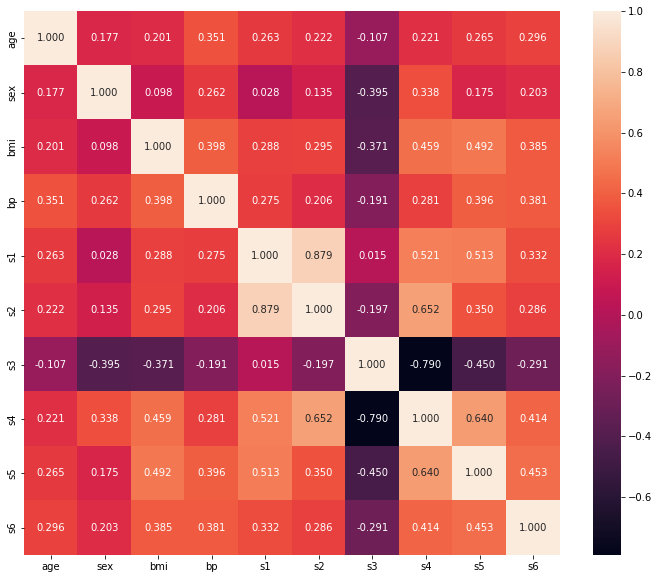

In [18]:
sns.heatmap(X.corr(method='spearman'), annot = True, fmt = '.3f')

##Skew of Univariate Distributions

In [19]:
X.skew()

age   -0.231382
sex    0.127385
bmi    0.598148
bp     0.290664
s1     0.378108
s2     0.436592
s3     0.799255
s4     0.735374
s5     0.291774
s6     0.207917
dtype: float64

#4. Analysis through visualization

##Histograms

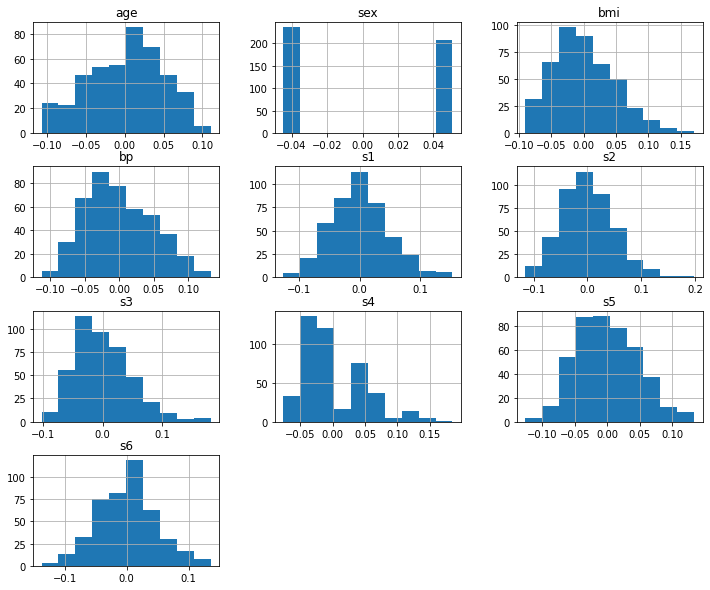

In [20]:
X.hist()
plt.show()

These histograms actually imply what we already observed. There must exist a previous preprocessing, although such information is not provided by the creators. So we see that most attributes, except 's1' and 's4', follow a smooth normal-like distribution and are all centered around a mean. Skewness also, which serves as a measure of 'outliers' is either too small or very moderate. However, for the purposes of our work, we will scale our data.

##Density plots

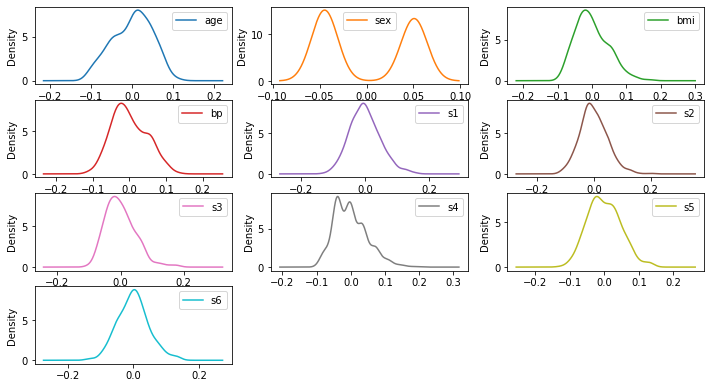

In [21]:
X.plot(kind='density', subplots=True, layout=(6,3), sharex=False)
plt.show()

##Box plots

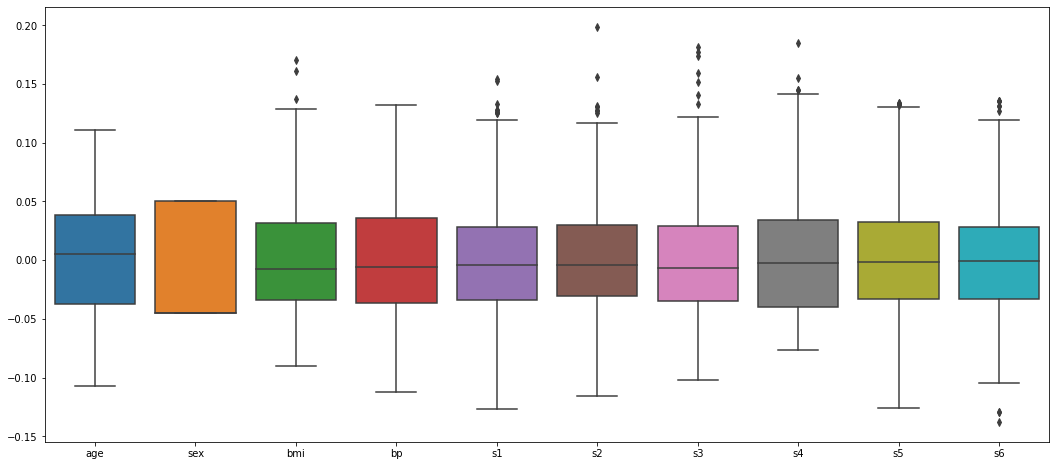

In [22]:
plt.figure(figsize=(18,8))
sns.boxplot(data=X)

##Scater plots 

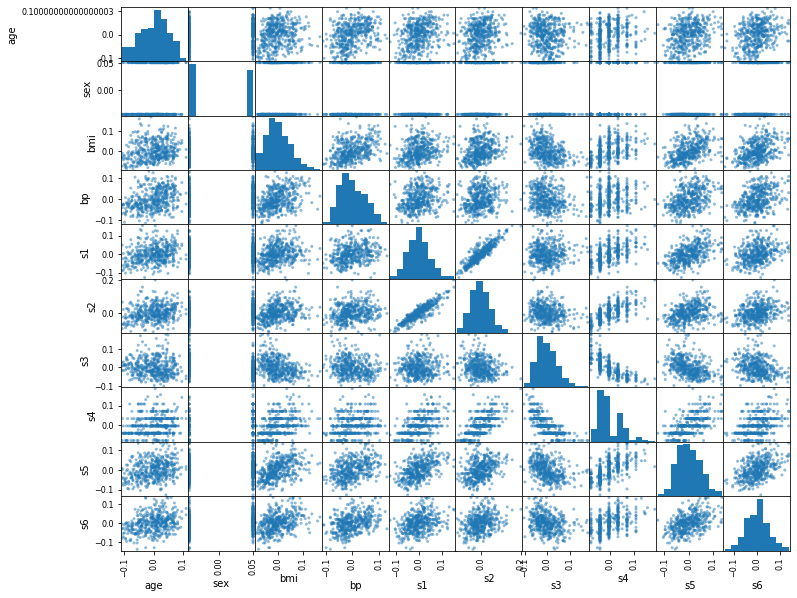

In [23]:
scatter_matrix(X)
plt.show()

#5. Model Selection

In [24]:
merged = pd.concat([X,y], axis = 1)
merged

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


Note: The prediction target has different order of magnitude from the features' values. Variation is also modest. There are no sharp or 'unexpected' values.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

At this point, we first split the dataset into train and test set. We then proceed by creating a transformation scaler that we then fit to the training and test set, respectively. This is to refrain from data leakage.

In [26]:
regressors = [
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    SGDRegressor()
]

At this point we just select a couple of regression algorithms, most of which are variants of Linear Regression. We then quickly train the models (with their default parameters) just to gain a general sense of how each one would perform for the given dataset.

In [27]:
df = pd.DataFrame(columns=['Model', 'Mean_val_score', 'Std Deviation', 'Training Time', 'Prediction Time', 'Explained Variance', 'Mean Squared Error', 'R2 Score'])
for model in regressors:
    start = time()
    scores = cross_val_score(model, X_train_sc, y_train, cv=10)
    model.fit(X_train_sc, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test_sc)
    predict_time = time()-start 
    df = df.append({'Model': model,
                    'Mean_val_score': np.mean(scores),
                    'Std Deviation': np.std(scores),
                    'Training Time': train_time,
                    'Prediction Time': predict_time,
                    'Explained Variance': explained_variance_score(y_test, y_pred),
                    'Mean Squared Error': mean_squared_error(y_test, y_pred),
                    'R2 Score': r2_score(y_test, y_pred)
                   }, ignore_index=True)
df  

,Model,Mean_val_score,Std Deviation,Training Time,Prediction Time,Explained Variance,Mean Squared Error,R2 Score
0,KNeighborsRegressor(),0.360868,0.108959,0.175151,0.008178,0.277966,3941.895281,0.260290
1,DecisionTreeRegressor(),-0.065462,0.233387,0.107484,0.000270,-0.263203,6731.651685,-0.263218
2,LinearRegression(),0.467491,0.104419,0.034894,0.007340,0.440726,2992.557681,0.438436
3,Lasso(),0.476364,0.098244,0.064791,0.000166,0.434341,3025.440682,0.432265
4,Ridge(),0.470326,0.102490,0.033660,0.000145,0.438655,3004.200176,0.436251
5,SGDRegressor(),0.475857,0.095779,0.067037,0.000316,0.431280,3046.248938,0.428361


R^2 score or coeffiecent of determination is generally a good measure of the quality of a prediction in a regression model. We get these scores, along with some other 'quality' evaluations to pick a couple of these models for the downstream process. 
The performance of the models is generally really poor. DecisionTreeRegressor also yieldied a negative r^2 score which is overall counter-intuitive and could not possibly yield meaningful predictions. So, for the shake of our analysis, we'll try to get the best possible instances of our models by tuning their hyperparameters. 
Combining R^2 score (the highest ones), and MSE (the lower ones ) we select to model-tune Lasso and Ridge models wich are variants of Linear Regression.

#6. Hyperparameter Tuning

In [28]:
param_grid = {'alpha': [0.001, 0.01, 0.00001, 1, 10, 100]}

grid_lasso = GridSearchCV(Lasso(), param_grid, scoring='r2', cv=10)

grid_lasso.fit(X_train_sc, y_train)

cfs = grid_lasso.best_estimator_.coef_

print("\n The best estimator across all searched params:\n",grid_lasso.best_estimator_)
print("\n The best score across all searched params:\n",grid_lasso.best_score_)
print("\n The best parameters across al searched params:\n",grid_lasso.best_params_)
print("\n The best coefficients of features:\n", cfs)


 The best estimator across all searched params:
 Lasso(alpha=1)

 The best score across all searched params:
 0.4763635230636544

 The best parameters across al searched params:
 {'alpha': 1}

 The best coefficients of features:
 [ -0.0835554  -11.02678804  25.40328593  14.09447807  -3.6436684
  -0.         -12.59787955   0.          23.55898019   2.27132597]


Lasso is a type of linear regression which adds a penalty term to the cost function. The penalty term constraints the model to shrink the coefficients of less important features to zero, effectively performing feature selection and reducing the complexity of the model. Best hyperparameter value here is 1 and the model's performance did increase slightly, but not as much as it takes to be considered reliable.

In [29]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(Ridge(), param_grid, scoring ='r2', cv=10)

grid_ridge.fit(X_train_sc, y_train)

print("\n The best estimator across all searched params:\n",grid_ridge.best_estimator_)
print("\n The best score across all searched params:\n",grid_ridge.best_score_)
print("\n The best parameters across al searched params:\n",grid_ridge.best_params_)



 The best estimator across all searched params:
 Ridge(alpha=10)

 The best score across all searched params:
 0.47628393404456304

 The best parameters across al searched params:
 {'alpha': 10}


Same for Ridge Regression here. Ridge is also a type of linear regression model that uses L2 regularization and adds a penalty term to the cost function based on the square of the model coefficients. But unlike Lasso, it does not set any coefficients to zero.

For Linear Regression there exist no hyperparameters to tune. We valuate the models obtained by their R² scores, which show us the link between the variability of the data and the correctness of the model (e.g. how good it can generalize). Generally, the closer R² to 1 the better, because it means the model is accurate.
Our results obtained are not satisfactory, being R² close to 0.5, even if it is good that the values are similar between the test and the train set. This shows that these types of model are not suitable for this type of problem.